In [1]:
from tf_keras_vis.activation_maximization import ActivationMaximization
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.random import uniform

In [4]:
model =  load_model('/Users/luizeduardosantos/Documents/Turing/Interpretando-CNNs/model2-files/')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 250, 250, 64)      9472      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 125, 125, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 119, 119, 32)      100384    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 59, 59, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 53, 53, 32)        50208     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 20, 20, 32)        5

In [5]:
from tf_keras_vis.utils.model_modifiers import ReplaceToLinear
 
replace2linear = ReplaceToLinear()

In [6]:
from tf_keras_vis.utils.scores import CategoricalScore
scores = CategoricalScore([0,1,2])
image_titles = ["Storm", "Yoda", "Darth"] #CORRIGIR
seed_input = uniform((3, 256, 256, 3), 0, 255)

In [7]:
from tf_keras_vis.activation_maximization import ActivationMaximization
 
activation_maximization = ActivationMaximization(model,
                                                 model_modifier=replace2linear,
                                                 clone=True)

In [8]:
from tf_keras_vis.activation_maximization.regularizers import Norm, TotalVariation2D
from tf_keras_vis.activation_maximization.callbacks import Progress, PrintLogger
activations = activation_maximization(scores, steps = 400,
                                      seed_input=seed_input,
                                      callbacks=[Progress()])

400/400 [==============================] - 255s 636ms/step - Score: 63800.1445 - TotalVariation2D: 19.6754 - Norm: 36.9417


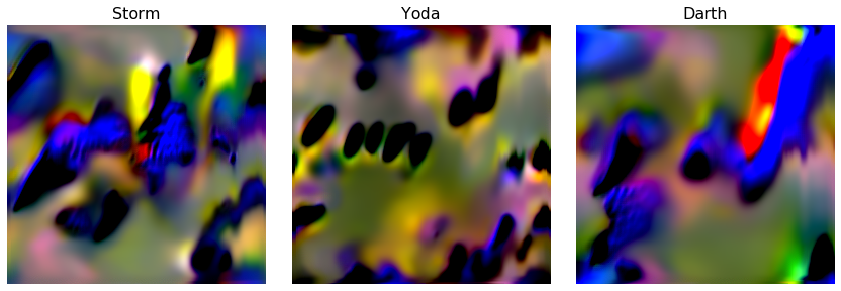

In [9]:
f, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
for i, title in enumerate(image_titles):
    ax[i].set_title(title, fontsize=16)
    ax[i].imshow(activations[i])
    ax[i].axis('off')
plt.tight_layout()
plt.show()